In [1]:
!pip install gensim scikit-learn matplotlib
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 24.0 MB/s eta 0:00:00


In [2]:
nltk.download('punkt')
nltk.download('punkt_tab') # Added to download the missing resource

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [5]:
corpus = [
    "Natural language processing is a fascinating field",
    "Word embeddings capture semantic meanings",
    "NLP is used in chatbots and virtual assistants"

]

In [6]:
tokenized_corpus = [word_tokenize(sentence.lower()) for sentence in corpus]
print(tokenized_corpus)

[['natural', 'language', 'processing', 'is', 'a', 'fascinating', 'field'], ['word', 'embeddings', 'capture', 'semantic', 'meanings'], ['nlp', 'is', 'used', 'in', 'chatbots', 'and', 'virtual', 'assistants']]


In [7]:
model = Word2Vec(sentences=tokenized_corpus, vector_size=100, window=5, min_count=1, workers=4)

In [8]:
# Save the model
model.save("word2vec.model")

model = Word2Vec.load("word2vec.model")

In [9]:
words = list(model.wv.index_to_key)[:10]  # Select the first 10 words
print(words)
word_vectors = [model.wv[word] for word in words]
print(word_vectors)

['is', 'assistants', 'virtual', 'and', 'chatbots', 'in', 'used', 'nlp', 'meanings', 'semantic']
[array([-5.3576409e-04,  2.3661218e-04,  5.1036254e-03,  9.0094497e-03,
       -9.3027651e-03, -7.1166274e-03,  6.4589563e-03,  8.9731254e-03,
       -5.0158305e-03, -3.7633833e-03,  7.3803845e-03, -1.5340848e-03,
       -4.5364588e-03,  6.5540425e-03, -4.8602954e-03, -1.8162075e-03,
        2.8770054e-03,  9.9248707e-04, -8.2855625e-03, -9.4494959e-03,
        7.3116031e-03,  5.0706030e-03,  6.7575304e-03,  7.6208723e-04,
        6.3506206e-03, -3.4051482e-03, -9.4629976e-04,  5.7690875e-03,
       -7.5219776e-03, -3.9358870e-03, -7.5120423e-03, -9.3033595e-04,
        9.5379166e-03, -7.3194900e-03, -2.3345447e-03, -1.9379876e-03,
        8.0774892e-03, -5.9309360e-03,  4.4726650e-05, -4.7534457e-03,
       -9.6030617e-03,  5.0070742e-03, -8.7596532e-03, -4.3911953e-03,
       -3.4485412e-05, -2.9588272e-04, -7.6617706e-03,  9.6141407e-03,
        4.9822307e-03,  9.2330044e-03, -8.1582591e-

In [10]:
from sklearn.decomposition import PCA

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_result = pca.fit_transform(word_vectors)

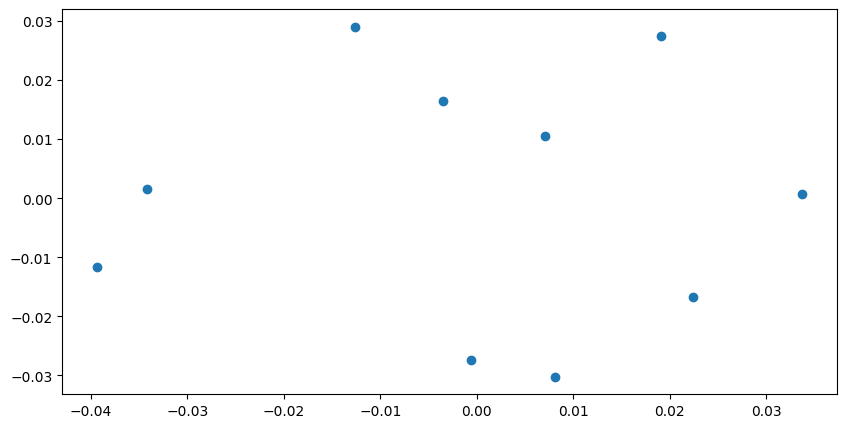

In [11]:
import matplotlib.pyplot as plt

# Plot the words in 2D space
plt.figure(figsize=(10, 5))
plt.scatter(pca_result[:, 0], pca_result[:, 1])

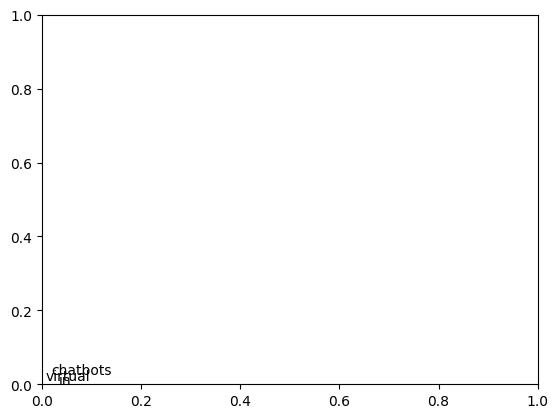

In [12]:
for i, word in enumerate(words):
    plt.annotate(word, xy=(pca_result[i, 0], pca_result[i, 1]))

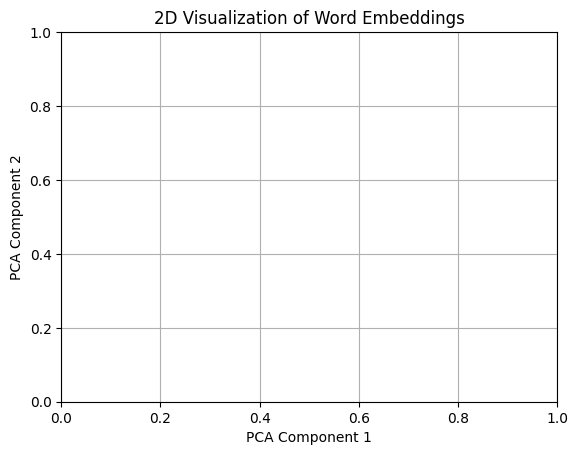

In [13]:
plt.title("2D Visualization of Word Embeddings")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()